In [48]:
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.io.wavfile import read
from scipy.fftpack import fft, ifft, rfft
import numpy as np
import wave
import os
import sys

In [49]:
# Backend fix, changed to type TkAgg, might not occur in other debugger

# plt.switch_backend('TkAgg')

# OverflowError fix, increased fixed chunksize

# plt.rcParams['agg.path.chunksize'] = 10000


# Take user input in the form of .wav
# Take in the .wav file name, make sure that the file is in the same directory as this python file
def takeInput():
    currentDir = os.path.dirname(os.path.realpath(__file__))
    fileName = raw_input('Enter wav file: ')
    fileType = fileName.split('.')[-1]
    
    wholePath = os.path.join(currentDir, fileName)

    # Wrong type

    if fileType != "wav":
        print 'Type not supported'
        sys.exit(0)

    # File doesn't exist

    elif not os.path.exists(wholePath):
        print 'Cannot find file'
        sys.exit(0)

    return wholePath

def takeInput(fileName):
    currentDir = os.path.dirname(os.path.realpath(fileName))
    fileType = fileName.split('.')[-1]
    
    wholePath = os.path.join(currentDir, fileName)

    # Wrong type

    if fileType != "wav":
        print 'Type not supported'
        sys.exit(0)

    # File doesn't exist

    elif not os.path.exists(wholePath):
        print 'Cannot find file'
        sys.exit(0)

    return wholePath

# Check for wav's channel type
# getnchannels() returns 2 if stereo, 1 if mono
def isStereo(file):
    return file.getnchannels() == 2


# Convert stereo wav file to mono by manipulating 2 dimensional array
# Stereo wav yields 2 channel in the form of [[left right], [left right] ....]
def stereoToMono(audioArray):
    monoResult = (audioArray[:, 0]/2) + (audioArray[:, 1]/2)  # (array[:,0]+array[:,1])/2 yields wrong result

    return np.array(monoResult, 'Int16')  # Return in dtype='int16'


# Plot wave for x-axis = time, y-axis = wave signal
# Return wave length for main processing
def processWave(path):
    f = wave.open(path, 'r')  # Processed wave, read-only mode
    
    if isStereo(f):
        # If Stereo, convert to mono, function somewhere up
        frameRate, x = read(path)  # Yields <Frame Rate, Audio Data>
        signal = stereoToMono(x)
    else:
        # If mono, do simple wave read
        frameRate = f.getframerate()  # Get frame rate for time axis (x-axis)
        signal = np.fromstring(f.readframes(-1), 'Int16')

        
    wavTime = np.linspace(0, float(len(signal))/frameRate, len(signal))  # Math stuff, nothing to see here
    
    f.close()
    return frameRate, signal, wavTime


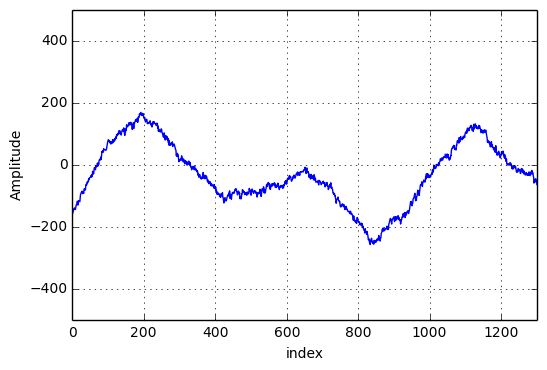

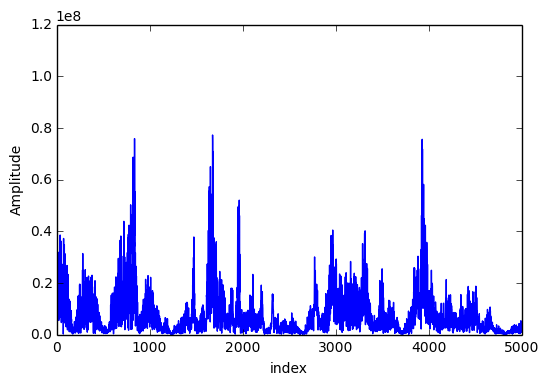

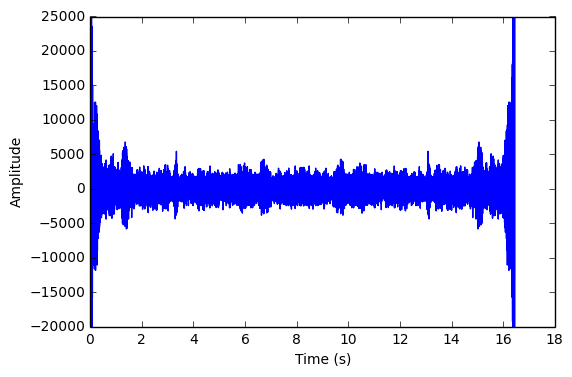

In [111]:
def execute():
    path = takeInput("athing.wav")
    fr, signal, wavTime = processWave(path)
    fftSignal = np.absolute(fft(signal))
    plotGraph([i for i in range(len(signal))],signal,"index", "Amplitude")
    plt.ylim(-500,500)
    plt.xlim(0,1300)
    plt.grid()
    plotGraph([i for i in range(len(fftSignal))][:],fftSignal[:],"index", "Amplitude")
    plt.xlim(0,5000)
    fftSignal[:1100] = 0
    newSig = ifft(fftSignal)
    plotGraph(wavTime,newSig,"Time (s)", "Amplitude")
    plt.ylim(-20000,25000)
#     wave.save("newthing.wav")
    return 0

def plotGraph(x,y,xl,yl):
    plt.figure()
    plt.plot(x, y, "blue")
    plt.xlabel(xl)
    plt.ylabel(yl)
    return 0

execute();